<a href="https://colab.research.google.com/github/jonnythebard/tf2_workbook/blob/master/cnn_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Install Tensorflow
# !pip install -q tensorflow-gpu==2.0.0-beta1
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.0.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [41]:
# load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [42]:
# the data is only 2D
# convolution expects (height * witdh * color) shape
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [43]:
K = len(set(y_train))
print("numbrt of classes:", K)

numbrt of classes: 10


In [46]:
# build the model

i = Input(shape=x_train[0].shape)
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1))(i)
x = BatchNormalization()(x)
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_30 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_31 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_44 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 64)        1849

In [47]:
# compile and fit
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 28s 467us/sample - loss: 0.6851 - accuracy: 0.7716 - val_loss: 0.4002 - val_accuracy: 0.8467
Epoch 2/30
60000/60000 [==============================] - 27s 443us/sample - loss: 0.4149 - accuracy: 0.8564 - val_loss: 0.2923 - val_accuracy: 0.8969
Epoch 3/30
60000/60000 [==============================] - 26s 441us/sample - loss: 0.3583 - accuracy: 0.8766 - val_loss: 0.2963 - val_accuracy: 0.8907
Epoch 4/30
60000/60000 [==============================] - 27s 445us/sample - loss: 0.3235 - accuracy: 0.8871 - val_loss: 0.2659 - val_accuracy: 0.9056
Epoch 5/30
60000/60000 [==============================] - 27s 442us/sample - loss: 0.2877 - accuracy: 0.8996 - val_loss: 0.2595 - val_accuracy: 0.9070
Epoch 6/30
60000/60000 [==============================] - 27s 444us/sample - loss: 0.2736 - accuracy: 0.9064 - val_loss: 0.2443 - val_accuracy: 0.9160
Epoch 7/30
60000/60000 [====================

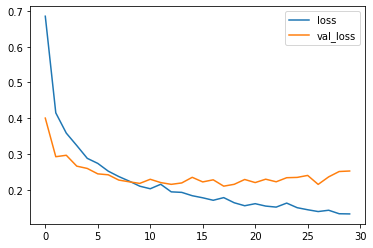

In [48]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

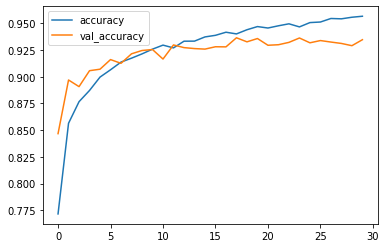

In [49]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()

Confusion matrix, without normalization
[[891   0  13  10   3   1  80   0   2   0]
 [  1 987   0   5   3   0   2   0   2   0]
 [ 13   2 898  10  39   0  38   0   0   0]
 [  3   2   6 944  20   0  25   0   0   0]
 [  0   0  23  21 927   0  29   0   0   0]
 [  0   0   0   0   0 985   0   9   0   6]
 [ 89   0  32  26  73   0 775   0   5   0]
 [  0   0   0   0   0   2   0 987   0  11]
 [  1   0   1   4   3   1   2   3 985   0]
 [  0   0   0   0   1   1   0  31   0 967]]


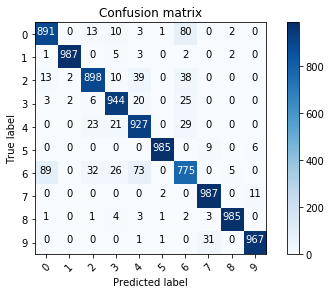

In [50]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

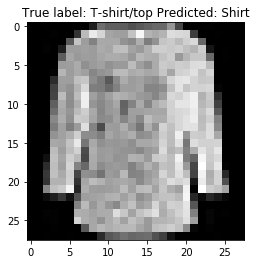

In [51]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));